In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip "/content/drive/My Drive/image captioning/145129_343604_bundle_archive.zip"

Streaming output truncated to the last 5000 lines.
  inflating: flickr_data/Flickr_Data/Images/2845845721_d0bc113ff7.jpg  
  inflating: flickr_data/Flickr_Data/Images/2846037553_1a1de50709.jpg  
  inflating: flickr_data/Flickr_Data/Images/2846785268_904c5fcf9f.jpg  
  inflating: flickr_data/Flickr_Data/Images/2846843520_b0e6211478.jpg  
  inflating: flickr_data/Flickr_Data/Images/2847514745_9a35493023.jpg  
  inflating: flickr_data/Flickr_Data/Images/2847615962_c330bded6e.jpg  
  inflating: flickr_data/Flickr_Data/Images/2847859796_4d9cb0d31f.jpg  
  inflating: flickr_data/Flickr_Data/Images/2848266893_9693c66275.jpg  
  inflating: flickr_data/Flickr_Data/Images/2848571082_26454cb981.jpg  
  inflating: flickr_data/Flickr_Data/Images/2848895544_6d06210e9d.jpg  
  inflating: flickr_data/Flickr_Data/Images/2848977044_446a31d86e.jpg  
  inflating: flickr_data/Flickr_Data/Images/2849194983_2968c72832.jpg  
  inflating: flickr_data/Flickr_Data/Images/2850719435_221f15e951.jpg  
  inflating: 

In [ ]:
def readTextfiles(path):
  with open(path) as f:
    captions = f.read()
  return captions
captions = readTextfiles("/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt")

In [ ]:
captions = captions.split("\n")[:-1]

In [ ]:
captions[1]
#lets have a dictionary where for each image id we can mark have all the caption related to it

'1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .'

In [ ]:
first,second = captions[1].split("\t")
print(first.split("."))

['1000268201_693b08cb0e', 'jpg#1']


In [ ]:
discriptions = {}
for x in captions:
  first,second = x.split('\t')
  img_name = first.split(".")[0]
  if discriptions.get(img_name) is  None:
    discriptions[img_name] = []
  discriptions[img_name].append(second)

In [ ]:
discriptions[first.split(".")[0]]

['A man in a pink shirt climbs a rock face',
 'A man is rock climbing high in the air .',
 'A person in a red shirt climbing up a rock face covered in assist handles .',
 'A rock climber in a red shirt .',
 'A rock climber practices on a rock climbing wall .']

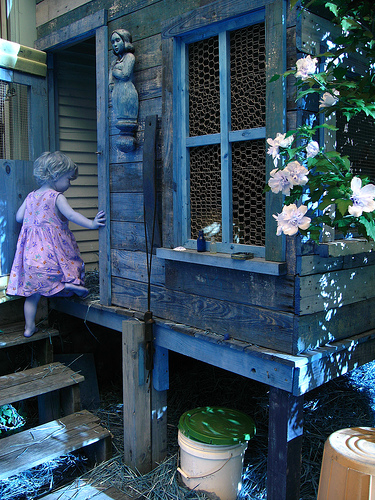

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
IMG_PATH = "/content/flickr_data/Flickr_Data/Images/1000268201_693b08cb0e.jpg"
img = cv2.imread(IMG_PATH)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(img)



In [ ]:
import re
def clean_text(sentence):
  sentence = sentence.lower()
  sentence  = re.sub("[^a-z]+"," ",sentence)
  sentence = sentence.split()
  sentence = [s for s in sentence if len(s)>1]
  sentence = " ".join(sentence)
  return sentence

In [ ]:
clean_text("A cat is sitting over a house #64")

'cat is sitting over house'

In [ ]:
for key,caption_list in discriptions.items():
  for i in range(len(caption_list)):
    caption_list[i] = clean_text(caption_list[i])


In [ ]:
with open("descriptions.txt","w") as f:
  f.write(str(discriptions))

In [ ]:
descriptions = None
with open("descriptions.txt","r") as f:
  descriptions = f.read()

In [ ]:
import json
json_acceptable_string = descriptions.replace("'","\"")
descriptions = json.loads(json_acceptable_string)


In [ ]:
print(type(descriptions))

<class 'dict'>


In [ ]:
vocab = set()
for key in descriptions.keys():
  [vocab.update(sentence.split()) for sentence in descriptions[key]]

In [ ]:
print("voacb size is %d"% len(vocab))

voacb size is 8424


In [ ]:
#total words across all sentences
total_words = []
for key in descriptions.keys():
  [total_words.append(i) for des in descriptions[key] for i in des.split()]

print("total no of words is %d"%len(total_words))

total no of words is 373837


In [ ]:
#filter words from vocab according to certain threshold

import collections
counter = collections.Counter(total_words)
freq_cnt  = dict(counter)
print(len(freq_cnt.keys()))

8424


In [ ]:
freq_cnt.items()

dict_items([('child', 1545), ('in', 18987), ('pink', 739), ('dress', 348), ('is', 9345), ('climbing', 507), ('up', 1302), ('set', 109), ('of', 6723), ('stairs', 109), ('an', 2432), ('entry', 1), ('way', 53), ('girl', 3328), ('going', 149), ('into', 1074), ('wooden', 284), ('building', 511), ('little', 1768), ('playhouse', 6), ('the', 18420), ('to', 3176), ('her', 1178), ('cabin', 4), ('black', 3848), ('dog', 8138), ('and', 8863), ('spotted', 38), ('are', 3505), ('fighting', 133), ('tri', 14), ('colored', 221), ('playing', 2008), ('with', 7765), ('each', 430), ('other', 773), ('on', 10746), ('road', 398), ('white', 3959), ('brown', 2578), ('spots', 29), ('staring', 57), ('at', 2916), ('street', 944), ('two', 5643), ('dogs', 2125), ('different', 46), ('breeds', 5), ('looking', 744), ('pavement', 48), ('moving', 41), ('toward', 146), ('covered', 372), ('paint', 62), ('sits', 577), ('front', 1386), ('painted', 64), ('rainbow', 22), ('hands', 246), ('bowl', 30), ('sitting', 1368), ('large',

In [ ]:
sorted_freq_cnt = sorted(freq_cnt.items(),reverse=True,key = lambda x:x[1])
sorted_freq_cnt

[('in', 18987),
 ('the', 18420),
 ('on', 10746),
 ('is', 9345),
 ('and', 8863),
 ('dog', 8138),
 ('with', 7765),
 ('man', 7275),
 ('of', 6723),
 ('two', 5643),
 ('white', 3959),
 ('black', 3848),
 ('boy', 3581),
 ('are', 3505),
 ('woman', 3403),
 ('girl', 3328),
 ('to', 3176),
 ('wearing', 3062),
 ('at', 2916),
 ('people', 2887),
 ('water', 2790),
 ('red', 2691),
 ('young', 2630),
 ('brown', 2578),
 ('an', 2432),
 ('his', 2357),
 ('blue', 2279),
 ('dogs', 2125),
 ('running', 2073),
 ('through', 2032),
 ('playing', 2008),
 ('while', 1968),
 ('shirt', 1962),
 ('down', 1843),
 ('standing', 1789),
 ('ball', 1783),
 ('little', 1768),
 ('grass', 1622),
 ('snow', 1547),
 ('child', 1545),
 ('person', 1542),
 ('jumping', 1473),
 ('over', 1415),
 ('three', 1389),
 ('front', 1386),
 ('sitting', 1368),
 ('holding', 1324),
 ('up', 1302),
 ('field', 1283),
 ('small', 1278),
 ('by', 1249),
 ('large', 1237),
 ('green', 1234),
 ('one', 1223),
 ('group', 1218),
 ('yellow', 1217),
 ('her', 1178),
 ('walk

**Filter(TO REDUCE SIZE OF VOCABULARY)**


In [ ]:
sorted_freq_cnt  = [x for x in sorted_freq_cnt if x[1]>10]
total_words = [word[0] for word in sorted_freq_cnt]

In [ ]:
len(total_words)

1845

In [ ]:
train_file_data = readTextfiles("/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt")
test_file_data = readTextfiles("/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt")


In [ ]:
train_file_data

'2513260012_03d33305cf.jpg\n2903617548_d3e38d7f88.jpg\n3338291921_fe7ae0c8f8.jpg\n488416045_1c6d903fe0.jpg\n2644326817_8f45080b87.jpg\n218342358_1755a9cce1.jpg\n2501968935_02f2cd8079.jpg\n2699342860_5288e203ea.jpg\n2638369467_8fc251595b.jpg\n2926786902_815a99a154.jpg\n2851304910_b5721199bc.jpg\n3423802527_94bd2b23b0.jpg\n3356369156_074750c6cc.jpg\n2294598473_40637b5c04.jpg\n1191338263_a4fa073154.jpg\n2380765956_6313d8cae3.jpg\n3197891333_b1b0fd1702.jpg\n3119887967_271a097464.jpg\n2276499757_b44dc6f8ce.jpg\n2506892928_7e79bec613.jpg\n2187222896_c206d63396.jpg\n2826769554_85c90864c9.jpg\n3097196395_ec06075389.jpg\n3603116579_4a28a932e2.jpg\n3339263085_6db9fd0981.jpg\n2532262109_87429a2cae.jpg\n2076906555_c20dc082db.jpg\n2502007071_82a8c639cf.jpg\n3113769557_9edbb8275c.jpg\n3325974730_3ee192e4ff.jpg\n1655781989_b15ab4cbff.jpg\n1662261486_db967930de.jpg\n2410562803_56ec09f41c.jpg\n2469498117_b4543e1460.jpg\n69710415_5c2bfb1058.jpg\n3414734842_beb543f400.jpg\n3006217970_90b42e6b27.jpg\n2192

In [ ]:
train =  [row.split(".")[0] for row in train_file_data.split("\n")[:-1]]
print(train[:5])



['2513260012_03d33305cf', '2903617548_d3e38d7f88', '3338291921_fe7ae0c8f8', '488416045_1c6d903fe0', '2644326817_8f45080b87']


In [ ]:
test =  [row.split(".")[0] for row in test_file_data.split("\n")[:-1]]

In [ ]:
test[:5]

['3385593926_d3e9c21170',
 '2677656448_6b7e7702af',
 '311146855_0b65fdb169',
 '1258913059_07c613f7ff',
 '241347760_d44c8d3a01']

In [ ]:
train_descriptions = {}
for img_id in train:
  train_descriptions[img_id] = []
  for occ in descriptions[img_id]:
    occ = "startseq "+occ+" endseq"
    train_descriptions[img_id].append(occ)



In [ ]:
train_descriptions

{'2513260012_03d33305cf': ['startseq black dog is running after white dog in the snow endseq',
  'startseq black dog chasing brown dog through snow endseq',
  'startseq two dogs chase each other across the snowy ground endseq',
  'startseq two dogs play together in the snow endseq',
  'startseq two dogs running through low lying body of water endseq'],
 '2903617548_d3e38d7f88': ['startseq little baby plays croquet endseq',
  'startseq little girl plays croquet next to truck endseq',
  'startseq the child is playing croquette by the truck endseq',
  'startseq the kid is in front of car with put and ball endseq',
  'startseq the little boy is playing with croquet hammer and ball beside the car endseq'],
 '3338291921_fe7ae0c8f8': ['startseq brown dog in the snow has something hot pink in its mouth endseq',
  'startseq brown dog in the snow holding pink hat endseq',
  'startseq brown dog is holding pink shirt in the snow endseq',
  'startseq dog is carrying something pink in its mouth whil

**USING RESNET_50 MODEL TO EXTRACT FEARTURES**

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

Using TensorFlow backend.


In [ ]:
model  = ResNet50(weights = "imagenet",input_shape = (224,224,3))
model.summary()

102858752/102853048 [==============================] - 4s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
________________________

In [ ]:
from keras.models import Model, load_model
model_new = Model(model.input,model.layers[-2].output) #creating new model to extract features

In [ ]:
from keras.preprocessing import image
import numpy as np

In [ ]:
def preprocess_img(img):
  img = image.load_img(img,target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  img = preprocess_input(img) #you guarantee that the images you load are compatible with preprocess_input
  return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[[ -30.939003   -61.779      -67.68     ]
   [  13.060997     6.2210007  -17.68     ]
   [  34.060997    32.221        5.3199997]
   ...
   [ -99.939     -116.779     -118.68     ]
   [ -98.939     -111.779     -118.68     ]
   [-101.939     -108.779     -120.68     ]]

  [[ -36.939003   -68.779      -72.68     ]
   [  21.060997     9.221001   -13.68     ]
   [  38.060997    37.221        8.32     ]
   ...
   [ -94.939     -104.779     -113.68     ]
   [ -93.939     -108.779     -116.68     ]
   [ -90.939      -86.779     -102.68     ]]

  [[ -39.939003   -74.779      -76.68     ]
   [  26.060997    13.221001    -9.68     ]
   [  41.060997    36.221        6.3199997]
   ...
   [ -99.939     -107.779     -115.68     ]
   [-101.939     -107.779     -121.68     ]
   [ -95.939     -101.779     -123.68     ]]

  ...

  [[ -27.939003    56.221      107.32     ]
   [ -92.939      -49.779       20.32     ]
   [ -49.939003   -13.778999    35.32     ]
   ...
   [ 150.061      132.22101    126.

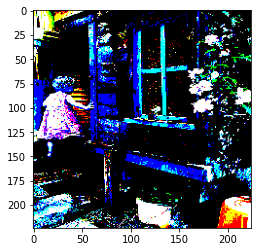

In [ ]:
img = preprocess_img("/content/Flickr_Data/Flickr_Data/Images/1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
print(img)  #lets not worry how image is looking as matplotlib imshow clips everything in range 0,1 

In [ ]:
def encode_image(img):   #will give us feature vector
  img = preprocess_img(img)
  feature_vector  = model_new.predict(img)
  feature_vector = feature_vector.reshape((2048,))

  return feature_vector

v = encode_image("/content/Flickr_Data/Flickr_Data/Images/1000268201_693b08cb0e.jpg")
v.shape

(2048,)

In [ ]:
from time import time
start_time = time()
encoding_train = {}
IMG_PATH = "/content/Flickr_Data/Flickr_Data/Images/"
for ix,img_id in enumerate(train):
  img_path = IMG_PATH +img_id +".jpg"
  encoding_train[img_id] = encode_image(img_path)
  if ix%100==0:
    print("encoding images in progress %d"%ix)

end_time = time()
print("Time taken %d"%(end_time-start_time))

encoding images in progress 0
encoding images in progress 100
encoding images in progress 200
encoding images in progress 300
encoding images in progress 400
encoding images in progress 500
encoding images in progress 600
encoding images in progress 700
encoding images in progress 800
encoding images in progress 900
encoding images in progress 1000
encoding images in progress 1100
encoding images in progress 1200
encoding images in progress 1300
encoding images in progress 1400
encoding images in progress 1500
encoding images in progress 1600
encoding images in progress 1700
encoding images in progress 1800
encoding images in progress 1900
encoding images in progress 2000
encoding images in progress 2100
encoding images in progress 2200
encoding images in progress 2300
encoding images in progress 2400
encoding images in progress 2500
encoding images in progress 2600
encoding images in progress 2700
encoding images in progress 2800
encoding images in progress 2900
encoding images in pro

In [ ]:
#store everything
import pickle
with open("encoded_train.pkl","wb") as f:
  pickle.dump(encoding_train,f)

In [ ]:
from time import time
start_time = time()
encoding_test = {}
IMG_PATH = "/content/Flickr_Data/Flickr_Data/Images/"
for ix,img_id in enumerate(test):
  img_path = IMG_PATH +img_id +".jpg"
  encoding_test[img_id] = encode_image(img_path)
  if ix%100==0:
    print("encoding images in progress %d"%ix)

end_time = time()
print("Time taken %d"%(end_time-start_time))

encoding images in progress 0
encoding images in progress 100
encoding images in progress 200
encoding images in progress 300
encoding images in progress 400
encoding images in progress 500
encoding images in progress 600
encoding images in progress 700
encoding images in progress 800
encoding images in progress 900
Time taken 35


In [ ]:
import pickle
with open("encoded_test.pkl","wb") as f:
  pickle.dump(encoding_test,f)

**Data preprocessing for captions**

In [ ]:
len(total_words)

1845

In [ ]:
word_2_idx = {}
idx_2_word = {}
for (i,cap) in enumerate(total_words):
  word_2_idx[cap]=i
  idx_2_word[i]=cap
  

In [ ]:
word_2_idx["startseq"] = 1846
idx_2_word[1846] = "startseq"
word_2_idx["endseq"] = 1847
idx_2_word[1847] = "endseq"



In [ ]:
word_2_idx["dog"]

5

In [ ]:
idx_2_word[5]

'dog'

In [ ]:
max_len = 0 
for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        max_len = max(max_len,len(cap.split()))
        
print(max_len)

35


In [ ]:
def data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):
  X1,X2,y = [],[],[]
  n=0
  while True:
    for key,desc_list in train_descriptions.items():
      n+=1
      photo = encoding_train[key+".jpg"]
      for desc in desc_list:
        seq = [word_to_idx[word] for word in desc.split() if word in word_to_idx.keys()]
        for i in range(1,len(seq)):
          xi = seq[0:i]
          yi = deq[i]
          #0 denotes padding of word
          xi = pad_sequence([xi],max_len,value=0,padding ="post")[0]
          yi = to_categorical([yi],num_classes = vocab_size)[0]

          X1.append(photo)
          X2.append(xi)
          y.append(yi)
        if n==batch.size():
          yield [[np.array(X1),np.array(X2)],np.array(y)]

        n=0
        X1,X2,y=[],[],[]



In [ ]:
from keras.utils import to_categorical

In [ ]:
#word embedding 
!unzip  "/content/drive/My Drive/image captioning/8542_11957_bundle_archive.zip"

Archive:  /content/drive/My Drive/image captioning/8542_11957_bundle_archive.zip
  inflating: glove.6B.50d.txt        


In [ ]:
f= open("/content/glove.6B.50d.txt",encoding="utf-8") 

In [ ]:
embedding_index ={}
for line in f:
  values = line.split()
  word = values[0]
  word_embedding = np.array(values[1:],dtype = "float32")
  embedding_index[word] = word_embedding


In [ ]:
f.close()

In [ ]:
vocab_size = len(word_2_idx) + 1
print("Vocab Size",vocab_size)

Vocab Size 1848


In [ ]:
def get_embedding_matrix():   #to convert each word in our vocab to 50 dim vector using glove to vector model
    emb_dim = 50
    matrix = np.zeros((vocab_size,emb_dim))
    for word,idx in word_2_idx.items():
        embedding_vector = embedding_index.get(word)
        
        if embedding_vector is not None:
            matrix[idx] = embedding_vector
            
    return matrix

In [ ]:
embedding_matrix = get_embedding_matrix()
embedding_matrix.shape

(1848, 50)

In [ ]:
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

In [ ]:
input_img_features = Input(shape=(2048,))   #feature vector of an image
inp_img1 = Dropout(0.3)(input_img_features) 
inp_img2 = Dense(256,activation='relu')(inp_img1)



In [ ]:
input_captions = Input(shape=(max_len,)) #caption for input
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [ ]:
decoder_1 = add([inp_img2,inp_cap3])
decoder_2 = Dense(256,activation='relu')(decoder_1)
outputs = Dense(vocab_size,activation='softmax')(decoder_2)
model = Model(inputs=[input_img_features,input_captions],outputs=outputs)   #compiling whole model



In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 50)       92400       input_5[0][0]                    
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 2048)         0           input_3[0][0]                    
____________________________________________________________________________________________

In [ ]:
model.layers[2].set_weights([embedding_matrix])  #as we already have embedding matrix ready with us
model.layers[2].trainable = False
model.compile(loss='categorical_crossentropy',optimizer="adam")

In [ ]:
epochs=20
batch_size=3
steps = len(train_descriptions)//batch_size

In [ ]:
def train():
    
    for i in range(epochs):
        generator = data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size)
        model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        model.save('./model_weights/model_'+str(i)+'.h5')

In [ ]:
from keras.models import Model, load_model
model =load_model('/content/model_9.h5')

In [ ]:
def predict(photo):
  in_text="start_seq"
  for i in range(max_len):
    sequence = [word_2_idx[w] for w in in_text.split() if w in word_2_idx]
    sequence = pad_sequences([sequence],maxlen = max_len,padding = "post")
    y_pred = model.predict([photo,sequence])
    y_pred = y_pred.argmax()
    word = idx_2_word[y_pred]
    in_text+=(' '+ word)
    if word == "endseq":
        break

  final_caption = in_text.split()[1:-1]  #to eliminate startseq and endseq
  final_caption = ' '.join(final_caption)
  return final_caption


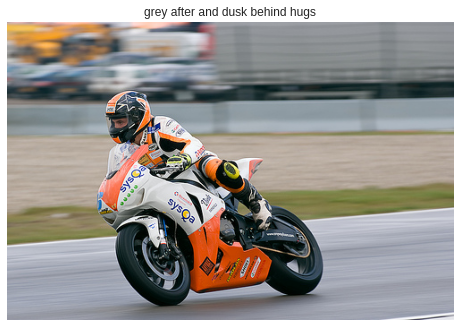

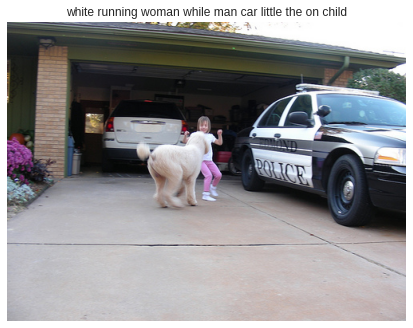

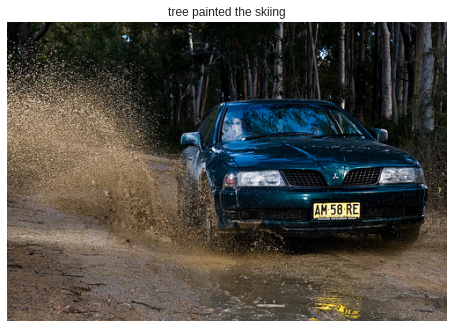

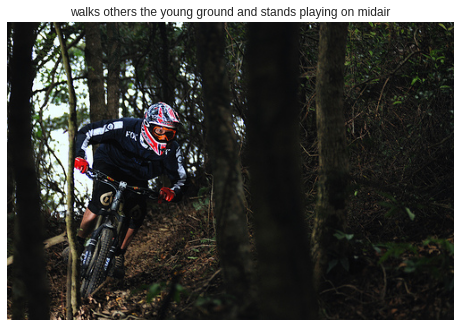

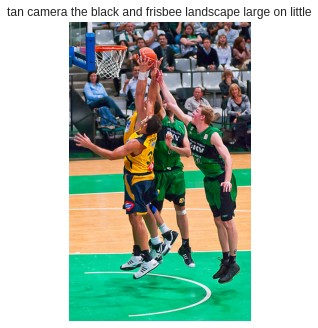

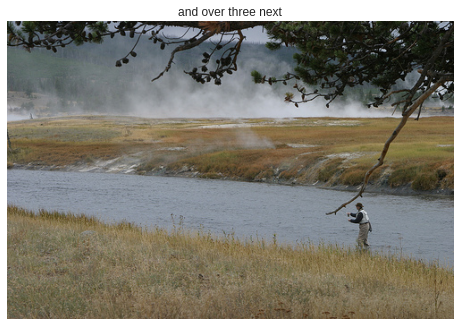

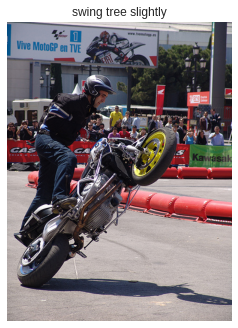

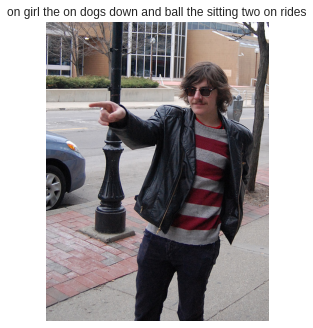

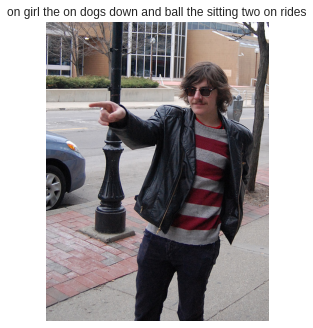

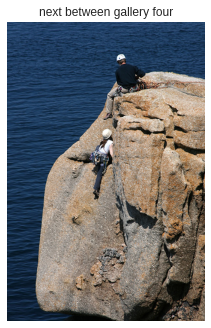

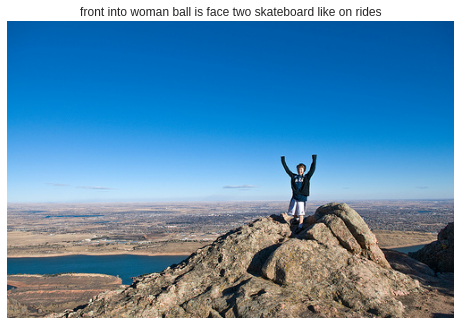

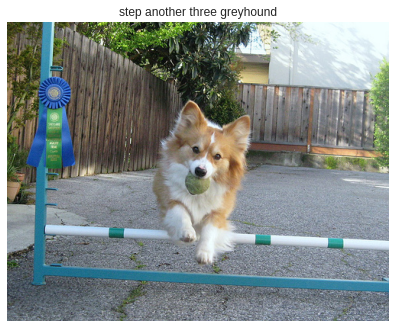

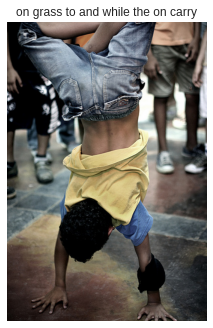

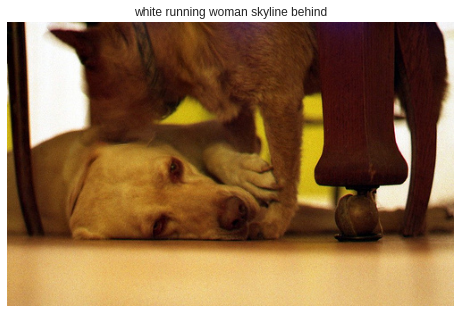

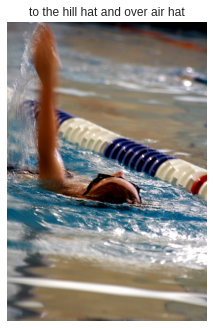

In [ ]:
from keras.preprocessing.sequence import pad_sequences
plt.style.use("seaborn")
for i in range(15):
    idx = np.random.randint(0,1000)
    all_img_names = list(encoding_test.keys())
    img_name = all_img_names[idx]
    photo_2048 = encoding_test[img_name].reshape((1,2048))
    
    i = plt.imread("/content/Flickr_Data/Flickr_Data/Images/"+img_name+".jpg")
    
    caption = predict(photo_2048)
    #print(caption)
    
    plt.title(caption)
    plt.imshow(i)
    plt.axis("off")
    plt.show()